<a href="https://colab.research.google.com/github/brandon-baek/IMDB-Rating-EDA/blob/main/IMDB_Rating_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Rating Research

## Prerequisites

In [6]:
!pip install umap-learn

import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import umap
from random import sample, seed
import numpy as np
from collections import Counter

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

### Data Preparation

In [7]:
df = pd.read_csv('/content/drive/MyDrive/HSAIRP/imdb_ratings.csv')

print(df.head())

                                              Review  Rating  Sentiment
0  Kurt Russell's chameleon-like performance, cou...      10          1
1  It was extremely low budget(it some scenes it ...       8          1
2  James Cagney is best known for his tough chara...       8          1
3  Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1
4  One of the last classics of the French New Wav...      10          1


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
print(df.describe())
print()
print(df.dtypes)

             Rating     Sentiment
count  49586.000000  49586.000000
mean       5.508168      0.501896
std        3.476930      0.500001
min        1.000000      0.000000
25%        2.000000      0.000000
50%        7.000000      1.000000
75%        9.000000      1.000000
max       10.000000      1.000000

Review       object
Rating        int64
Sentiment     int64
dtype: object


In [10]:
df['Rating'] < 10

,Rating
0,False
1,True
2,True
3,True
4,False
...,...
49995,True
49996,True
49997,True
49998,True


## EDA

### N-gram Frequency

In [16]:
def get_ngrams(text, n):
    words = text.lower().split()
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

In [34]:
reviews_combined = ' '.join(df['Review'])
unigrams = get_ngrams(reviews_combined, 1)
bigrams = get_ngrams(reviews_combined, 2)
trigrams = get_ngrams(reviews_combined, 3)
quadgrams = get_ngrams(reviews_combined, 4)
quingrams = get_ngrams(reviews_combined, 5)

print('- Most Common Unigrams -')
print(Counter(unigrams).most_common(100))

print('\n- Most Common Bigrams -')
print(Counter(bigrams).most_common(100))

print('\n- Most Common Trigrams -')
print(Counter(trigrams).most_common(100))

print('\n- Most Common Quadgrams -')
print(Counter(quadgrams).most_common(100))

print('\n- Most Common Quingrams -')
print(Counter(quingrams).most_common(100))

- Most Common Unigrams -
[('the', 633453), ('a', 314031), ('and', 310940), ('of', 284207), ('to', 262260), ('is', 203213), ('in', 178236), ('i', 140369), ('this', 137295), ('that', 128974), ('it', 128513), ('/><br', 100103), ('was', 92465), ('as', 87452), ('with', 83816), ('for', 83768), ('but', 77194), ('on', 62343), ('movie', 60979), ('are', 56538), ('his', 56438), ('not', 56251), ('you', 55068), ('film', 54639), ('have', 53931), ('he', 50710), ('be', 50424), ('at', 44879), ('one', 44588), ('by', 43005), ('an', 41914), ('they', 40511), ('from', 39032), ('all', 38261), ('who', 37983), ('like', 36940), ('so', 35648), ('just', 33986), ('or', 33012), ('has', 32300), ('about', 32132), ("it's", 30954), ('her', 30922), ('if', 30505), ('some', 29900), ('out', 28733), ('what', 27742), ('when', 26689), ('very', 26686), ('there', 25892), ('more', 25635), ('would', 23586), ('even', 23465), ('my', 23295), ('good', 23275), ('she', 23145), ('their', 22415), ('only', 22382), ('no', 22193), ('really'

### Embeddings visualization

In [ ]:
review_embeddings = model.encode(list(df['Review']), batch_size=1024, show_progress_bar=True, device='cuda')
review_embeddings.shape

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

(49586, 384)

In [ ]:
y = df['Rating']

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
reduced_X = reducer.fit_transform(review_embeddings)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


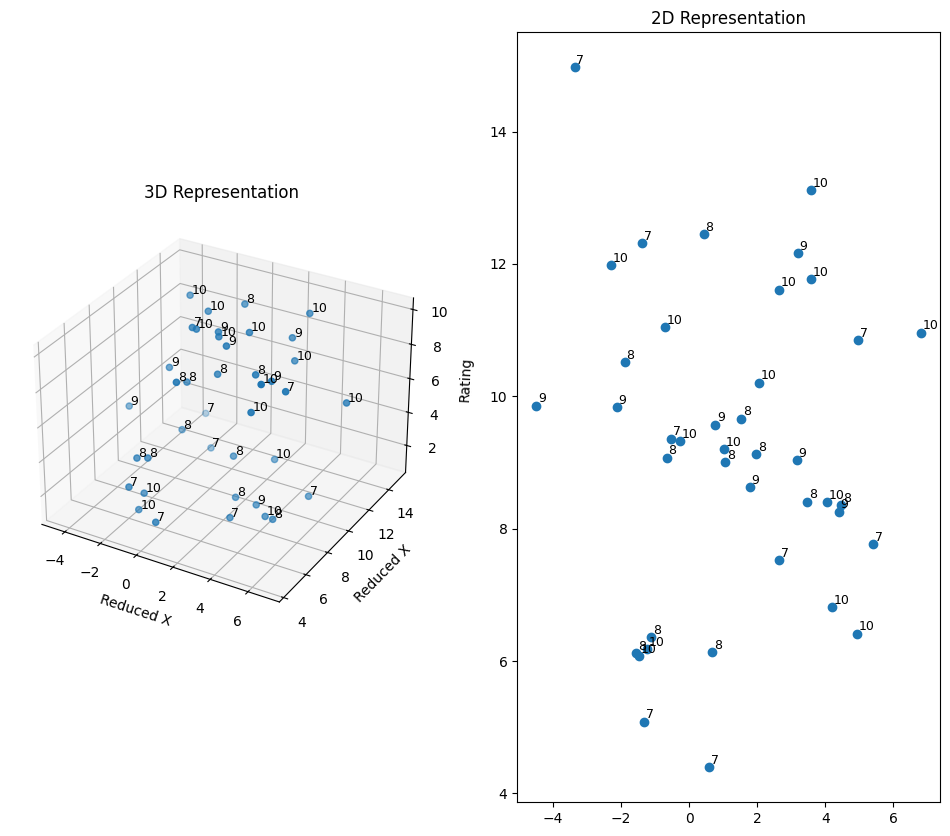

In [ ]:
amount_shown = 40
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

seed(42)
shuffled_X = np.array(sample(list(reduced_X), len(reduced_X)))
shuffled_y = np.array(sample(list(y), len(y)))

ax1.scatter(shuffled_X[:, 0][:amount_shown], shuffled_X[:, -1][:amount_shown], shuffled_y[:amount_shown])

ax1.set_xlabel('Reduced X')
ax1.set_ylabel('Reduced X')
ax1.set_zlabel('Rating')

for i in range(amount_shown):
    ax1.text(shuffled_X[i][0]+0.05, shuffled_X[i][-1]+0.05, shuffled_y[i]+0.05, df['Rating'][i], fontsize=9)

ax1.set_title('3D Representation')

ax2.scatter(shuffled_X[:, 0][:amount_shown], shuffled_X[:, -1][:amount_shown])

for i in range(amount_shown):
    ax2.text(shuffled_X[i][0]+0.05, shuffled_X[i][-1]+0.05, df['Rating'][i], fontsize=9)

ax2.set_title('2D Representation')

plt.show()